## Исследование рынка видеоигр

Датасет содержит данные  о продаж игр в разнычных регионах. Необходимо подготовить данные (исправить формат, решить проблему с пропущенными значениями, проверить дубликаты), проанализировать ключевые аспекты продаж (динамику по годам, платформам, жанрам), составить портрет пользователей игр по регионам, проверить гипотезы о различии рейтингов игр различных платформ и жанров.

## 1. Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датасет содержит 11 колонок и 16 715 строк.
В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating имеются пропущенные значения.

## 2. Подготовка данных

### 2.1 Приведение столбцов к нижнему регистру

In [5]:
df.columns = df.columns.map(lambda x: x.lower())
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Обработка пропусков

Наличие 2 пропущенных строк в столбце name и столбце genre и ряде других. Вероятно, они вызваны ошибкой при вводе данных. Эти 2 строки не являются информативными, удалим их из датасета.

In [6]:
df.loc[df['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df = df.loc[df['name'].isnull() != True]

<b>Обработка пропусков столбца year_of_release:</b>

In [8]:
# 269 значений столбца year_of_release пропущено (т.е. около 2% данных).

df['year_of_release'].isnull().sum()

269

In [9]:
df = df.loc[df['year_of_release'].isnull() != True]
df['year_of_release'].isnull().sum()

0

<b>Обработка пропусков столбца critic_score:</b>

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
print(df.loc[df['user_score'] == 'tbd'].shape[0] / df.shape[0] * 100)
print(df.loc[df['user_score'].isnull() == True].shape[0] / df.shape[0] * 100)

14.449039163220629
40.166626125030405


В user_score содержатся 2 типа пропущенных значений (14% и 40% пропусков, соответсвенно):
1) tbd - в user_score очевидно, означает to be determined и предполагает, что знаение будет добавлено позже. Заменим эти значения на -2
2) nan - отсутсвие какого-либо знаечния, заменим эти пропуски на -1.
Также приведем к типу данных float.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', -2)
df['user_score'].fillna(-1, inplace=True)
df['user_score'] = df['user_score'].astype('float')
df['user_score'].sort_values().unique()

array([-2. , -1. ,  0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7])

 <b>Обработка пропусков столбца rating:</b>

In [13]:
print(df['rating'].unique())
print(df.loc[df['rating'].isna() == True].shape[0] / df.shape[0] * 100)

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
40.59839455120409


40% строк столбца rating пропущены. Заменим эти пропуски на tbd, предполагая, что рейтинг данным играм будет назначен когда-либо.

In [14]:
df['rating'].fillna('tbd', inplace=True)
df['rating'].unique()

array(['E', 'tbd', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В данном разделе исследования были обработаны значения датасета:
    <li>удалены, строки, содержащие слишком мало информации,
    <li>пропущенные знаечния столбцов critic_score, user_score, rating замены на знначения-заглушки.

### 2.3. Преобразование типов данных

Приведем year_of_release к integer, перед этим запонив пропуски. Это необходимо сделать для корректного построения диаграм и анализа.

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,tbd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,tbd


In [16]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

0% Игр выпущены в 2007 году или ранее, самая ранняя игра в датасете выпущена в 1980 году, самая поздняя - в 2016.

### 2.4. Суммирование продаж

In [17]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,tbd,28.31


* Самой продаваемой игрой является <b>Wii Sports</b>.
* 5 из топ-10 игр приходятся на платформу <b>Wii</b>.
* Нельзя сказать, что среди топ-10 игр преобладают 00е и 90е гг (в 00х годах вышло 6 самых продаваемых игр датасета).

<b>Вывод по разделу</b>
<br>Данные были приведены в удобный для последующего анализа вид:
    <li>значения столбца year_of_release приведены к int,
    <li>изучена базовая дискриптивная статистика релизов: определен диапазон лет выпуска игр и медианное значение года релизов,
    <li>добавлен столбец с общей суммой проданных копий для каждой игры.

## 3. Исследовательский анализ данных

### 3.1  Динамика релизов по годам

Text(0, 0.5, 'Число проданных игр, млн. копий')

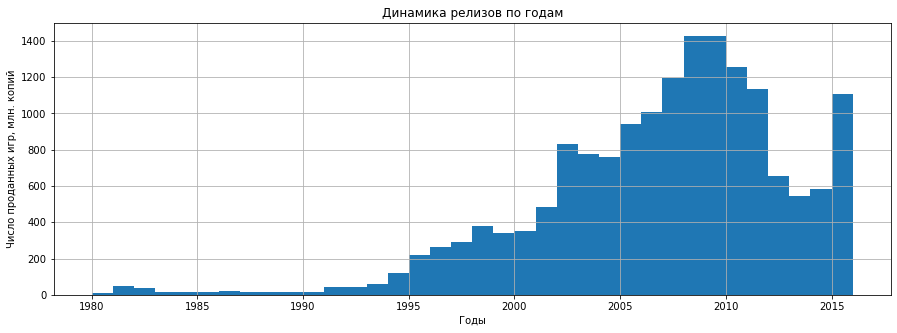

In [18]:
df['year_of_release'].plot(kind='hist',
                          figsize=(15, 5),
                          grid=True,
                          bins=36, # 36 - разность между самым первым и самым последним годом релиза.
                          title='Динамика релизов по годам'),
plt.xlabel('Годы')
plt.ylabel('Число проданных игр, млн. копий')

До 1991 г. число выпускаемых игр оставалось практически неизменным; с 1995 г. релизов становится все больше. Наибольшее число игр было выпущено в 2008-2010 гг. (более 1400 единиц в год).
С 2010 г. число выпускаемых игр стало сокращаться, достигнув почти 600 единиц в 2015 г., а в 2016 г. произошел резкий всплеск до более, чем 1 000 единиц.

### 3.2  Распределение релизов по платформам

<AxesSubplot:title={'center':'Суммы продаж по платформам, млн. копий'}, ylabel='total_sales'>

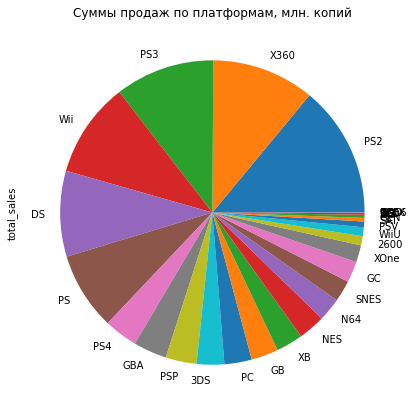

In [19]:
sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

sales_by_platform.plot(kind='pie',
                       figsize=(7,7),
                       title='Суммы продаж по платформам, млн. копий',
                       )

Явное лидерство у 6 платформ, поэтому распределение продаж по годам будем использовать на выборке из них.

In [20]:
top_platforms = df.groupby('platform').agg({'total_sales':'sum'}).reset_index()
top_platforms.sort_values(by='total_sales', ascending=False).head(6)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58


In [21]:
# Сумма продаж топ-6 платформ.

top_platforms = df.groupby('platform')\
                            .agg({'total_sales':'sum'})\
                            .sort_values(by = 'total_sales', ascending = False)[:6]\
                            .index



# Группировка топ-6 платформ по годам релиза.

platforms_by_year = df.pivot_table(index=['platform','year_of_release'],
                                            values = 'total_sales',
                                            aggfunc = 'sum')

platforms_by_year['years'] =  platforms_by_year.index
platforms_by_year['years'] = platforms_by_year['years'].apply (lambda row: row[1]).astype('int')

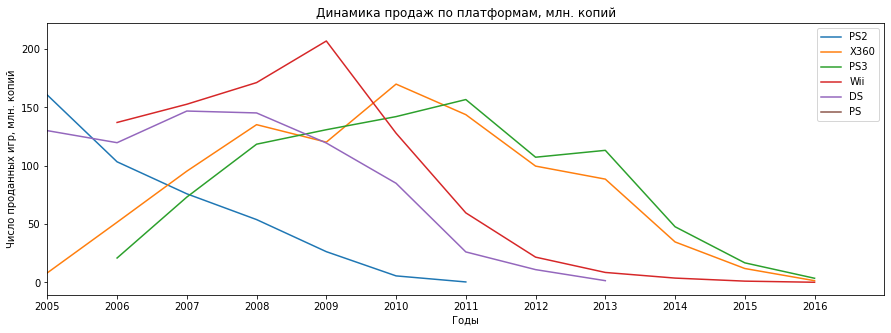

In [22]:
fig, ax = plt.subplots(figsize =(15,5))

for platform in top_platforms:
    platforms_by_year.loc[platform].plot('years','total_sales',
                                         ax=ax)

ax.set_title('Динамика продаж по платформам, млн. копий')
ax.legend(top_platforms)
ax.set_xlim([2005,2017])
ax.set_xticks(np.arange(2005,2017))
ax.set_xlabel('Годы')
ax.set_ylabel('Число проданных игр, млн. копий')

plt.show()

У большинства платформ с топовым числом продаж копий спад начиняется через 1-3 года после выхода на пик: например, PS2 в 2002 года была близка к пиковому значению, а после 2004 пошел спад; DC вышла на пик в 2007, но после 2008 пошел спад и т.д.)
<br>В качестве актуального периода для исследования рассмотрим 2013-2016 гг, так как это период затухания платформ, популярных в прошлом.

In [23]:
actual_period = df.loc[(df['year_of_release'] >=2013) & (df['year_of_release'] <=2016)]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,tbd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-1.0,tbd,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,tbd,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,-1.0,tbd,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,tbd,0.01


In [24]:
len(actual_period['platform'].unique())

11

В актуальном датасете остается 11 платформ, рассмотрим распределение продаж среди них.

<AxesSubplot:title={'center':'Суммы продаж по платформам, млн. копий'}, ylabel='total_sales'>

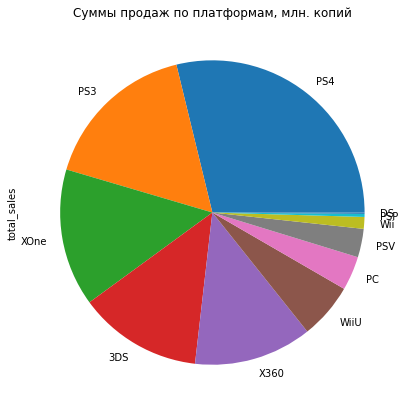

In [25]:
sales_by_platform = actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

sales_by_platform.plot(kind='pie',
                       figsize=(7,7),
                       title='Суммы продаж по платформам, млн. копий')

Лидерство у 5 платформ: <b>PS4</b>, <b>PS3</b>, <b>XOne</b>, <b>3DS</b>, <b>X360</b>. Рассмотрим их динамику продаж по годам.

In [26]:
top_platforms = actual_period.groupby('platform')\
                            .agg({'total_sales':'sum'})\
                            .sort_values(by = 'total_sales', ascending = False)[:5]\
                            .index



actual_period_by_year = actual_period.pivot_table(index = ['platform', 'year_of_release'], 
                                                    values = 'total_sales',
                                                    aggfunc = 'sum')

actual_period_by_year['years'] =  actual_period_by_year.index
actual_period_by_year['years'] = actual_period_by_year['years'].apply (lambda row: row[1]).astype('int')

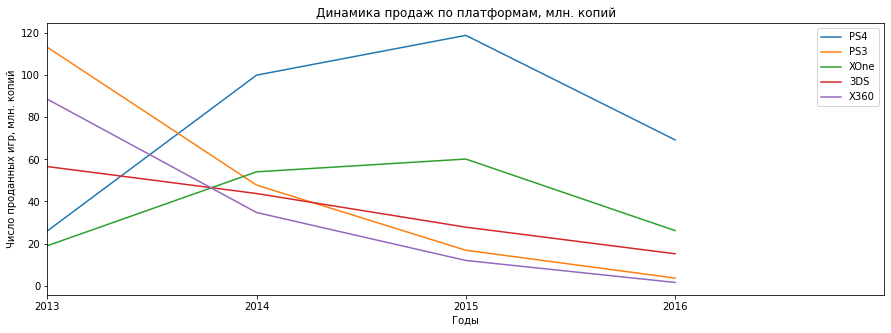

In [27]:
fig, ax = plt.subplots(figsize =(15,5))

for platform in top_platforms:
    actual_period_by_year.loc[platform].plot('years','total_sales',
                                         ax=ax)

ax.set_title('Динамика продаж по платформам, млн. копий')
ax.legend(top_platforms)
ax.set_xlim([2013,2017])
ax.set_xticks(np.arange(2013,2017))
ax.set_xlabel('Годы')
ax.set_ylabel('Число проданных игр, млн. копий')

plt.show()

Платформы <b>PS3</b>, <b>X360</b> и <b>3DS</b> находятся в нисходящем тренде (принимая во внимание вывод выше о том, что период топовых продаж платформ составляет 1-3 года. Возможно, <b>PS4</b> и <b>XOne</b> еще не прошли свой пик и по-прежнему являются перспективными для продаж.

### 3.3 Распределение продаж у различных платформ

Text(0, 0.5, 'Число проданных игр, млн. копий')

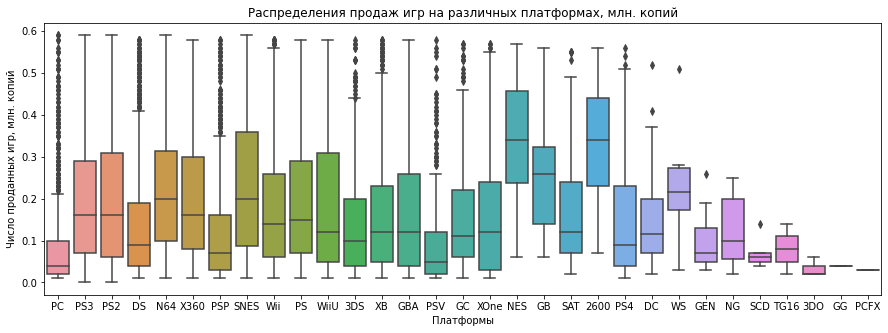

In [28]:
df2 = pd.read_csv('datasets/games.csv')
df2['total_sales'] = df2[['NA_sales','EU_sales','JP_sales', 'Other_sales']].sum(axis = 1)

upper_quantile = df2['total_sales'].quantile(0.75)
lower_quantile = df2['total_sales'].quantile(0.25)

threshold = upper_quantile + 2*lower_quantile

fig, ax = plt.subplots(figsize =(15,5))

sns.boxplot(x = 'Platform', 
            y = 'total_sales',
            data = df2.query('total_sales <= @threshold'),
            ax=ax)
  
ax.set_title('Распределения продаж игр на различных платформах, млн. копий')
ax.set_xlabel('Платформы')
ax.set_ylabel('Число проданных игр, млн. копий')

Text(0, 0.5, 'Число проданных игр, млн. копий')

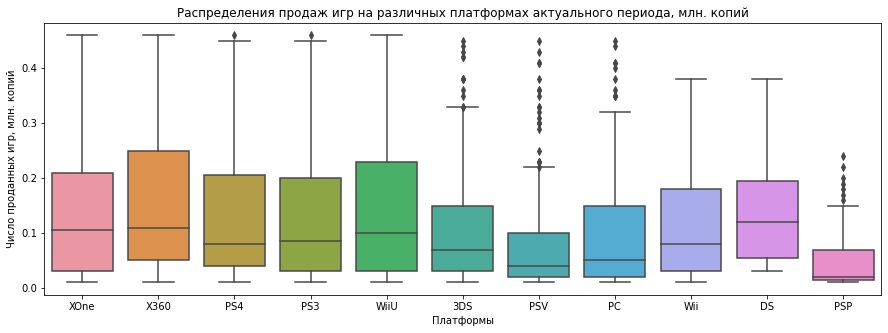

In [29]:
upper_quantile = actual_period['total_sales'].quantile(0.75)
lower_quantile = actual_period['total_sales'].quantile(0.25)

threshold = upper_quantile + 2*lower_quantile

fig, ax = plt.subplots(figsize =(15,5))

sns.boxplot(x = 'platform', 
            y = 'total_sales',
            data = actual_period.query('total_sales <= @threshold'),
            ax=ax)

ax.set_title('Распределения продаж игр на различных платформах актуального периода, млн. копий')
ax.set_xlabel('Платформы')
ax.set_ylabel('Число проданных игр, млн. копий')

<b>XOne</b> и <b>DS</b> имеют наиболее равно распределенные значения. Платформы <b>3DS</b>, <b>PSV</b>, <b>PC</b>, <b>PSP</b> имеют наименее равномерные распределения продаж.

### 3.4  Влияние отзывов критиков на продажи

In [30]:
print(actual_period['critic_score'].sort_values().unique(), '\n\n')
print(actual_period['user_score'].sort_values().unique())

[13. 19. 20. 23. 25. 26. 31. 32. 33. 34. 35. 36. 38. 39. 40. 42. 43. 44.
 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62.
 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.
 81. 82. 83. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97. nan] 


[-2.  -1.   0.2  0.7  1.   1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1
  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5
  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9
  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3]


In [31]:
# Используем для анализа только строки, в которых имеются реальные оценки критиков и пользователей.

actual_period_by_cscore = actual_period.query('critic_score > 0')
actual_period_by_uscore = actual_period.query('user_score > 0')

In [32]:
# Сведем оценки критиков и пользователей в одну таблицу для сравнения.

actual_period_by_cscore = actual_period_by_cscore.groupby('platform')\
                            .agg({'total_sales':['count','sum'],\
                                  'critic_score':['mean', 'median']}) 

actual_period_by_uscore = actual_period_by_uscore.groupby('platform')\
                            .agg({'total_sales':['count','sum'],\
                                  'user_score':['mean', 'median']}) 

actual_period_by_cscore.merge(actual_period_by_uscore, on='platform', how='left') 

total_sales_x         critic_score        total_sales_y          \
                 count     sum         mean median         count     sum   
platform                                                                   
3DS                 71   40.32    68.338028   69.0            80   43.25   
PC                 149   34.84    75.550336   77.0           155   35.06   
PS3                121  114.07    70.198347   73.0           186  152.15   
PS4                252  244.49    72.091270   73.0           257  244.92   
PSP                  1    0.15    74.000000   74.0             2    0.34   
PSV                 77   13.99    71.636364   72.0            99   17.28   
WiiU                70   51.42    71.642857   73.5            80   52.36   
X360                81   85.27    69.234568   74.0           143  116.20   
XOne               169  130.40    73.325444   76.0           182  134.26   

         user_score         
               mean median  
platform                    
3DS        6.976250   7.30  
PC         6.269677   6.80  
PS3        6.348387   6.90  
PS4        6.748249   7.00  
PSP        5.850000   5.85  
PSV        7.527273   7.80  
WiiU       7.017500   7.30  
X360       5.993007   6.20  
XOne       6.521429   6.80

<table>
    <tr>
        <th></th>
        <th><p  align='left'>Критики</p></th>
        <th><p  align='left'>Пользователи</p></th>
    </tr>
    <tr>
        <td><p  align='left'>Медиана</p></td>
        <td><p  align='left'>Значения оценки критиков не сильно отклоняются от средних (то есть мнения разных критиков оказываются близкими), наибольшая неоднорость в оценках игр платформы X360 и XOne.</p></td>
        <td><p  align='left'>Значения оценки пользователей не сильно отклоняются от средних, наибольшая неоднорость в оценках игр платформы PS3.</p></td>
    </tr>
       <tr>
        <td><p  align='left'>Лучшая платформа</p></td>
        <td><p  align='left'>PC (медиана 77)</p></td>
        <td><p  align='left'>PSV (медиана 7,8)</p></td>
    </tr>
       <tr>
        <td><p  align='left'>Худшая платформа</p></td>
        <td><p  align='left'>3DS (медиана 69, среднее 68)</p></td>
        <td><p  align='left'>PSP (медиана 5,9, среднее 5,85)</p></td>
    </tr>
</table>

Таким образом, оценки платформ критиками и пользователями ранятся: то, что критики считают лучшим, рассматривается пользователями ка средне-высокое.

In [33]:
# Выделим топ-5 платформ по продажам для анализа отзывов критиков.
actual_period_by_cscore['total_sales'].sort_values(by='count', ascending=False)['count'].head(5)

platform
PS4     252
XOne    169
PC      149
PS3     121
X360     81
Name: count, dtype: int64

In [34]:
# Создадим функцию для построения графиков и подсчета коррекляций продаж и рейтинга критиков.

def score_corr(platform, color):
    fig, ax = plt.subplots(figsize =(8,4))
    ax.set_title('Зависимость продаж игр от рейтинга критиков платформы {}'.format(platform))
    ax.set_xlabel('Рейтинг')
    ax.set_ylabel('Число проданных игр, млн. копий')

    sns.scatterplot(data=actual_period.query('platform==@platform & critic_score > 0'),
                    x='critic_score',
                    y='total_sales',
                    color=color)

    print('Корреляция между продажами платформы {} и отзывами критиков:'.format(platform), \
          round(actual_period.query('platform==@platform')['critic_score'].corr(actual_period.query('platform==@platform')['total_sales']), 3)
          )

Корреляция между продажами платформы PS4 и отзывами критиков: 0.407
Корреляция между продажами платформы XOne и отзывами критиков: 0.417
Корреляция между продажами платформы PC и отзывами критиков: 0.196
Корреляция между продажами платформы PS3 и отзывами критиков: 0.334
Корреляция между продажами платформы X360 и отзывами критиков: 0.35


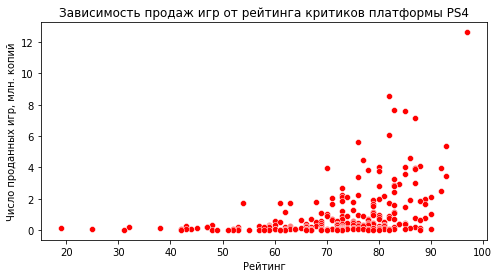

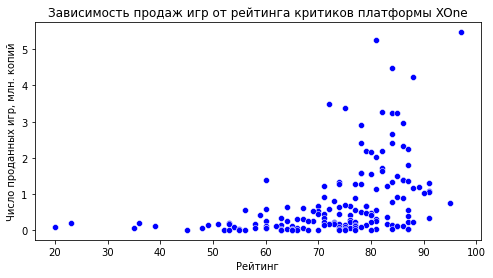

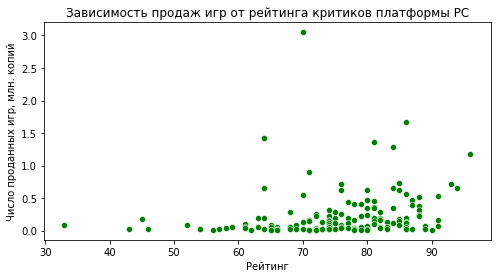

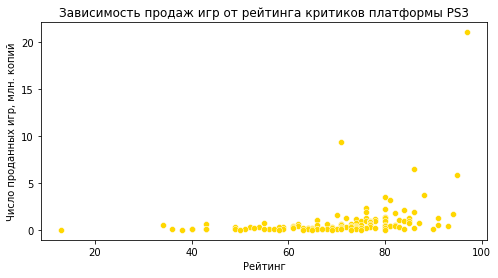

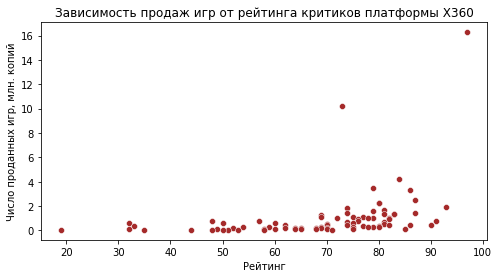

In [35]:
score_corr('PS4', 'red')
score_corr('XOne', 'blue')
score_corr('PC', 'green')
score_corr('PS3', 'gold')
score_corr('X360', 'brown')

Диапазон корреляциии у популярных платформ варьируется от 0,19 (<b>PS3</b>) до 0,35 (<b>PS4</b>), то есть нельзя сказать, что она сильная и мнение критиков не отражается на количестве проданных копий той или иной платформы. Вероятно, все зависит от конкретной игры.

### 3.5  Влияение отзывов пользователей на продажи

In [36]:
# Выделим топ-5 платформ по продажам для анализа отзывов пользователей.

actual_period_by_uscore['total_sales'].sort_values(by='count', ascending=False)['count'].head(5)

platform
PS4     257
PS3     186
XOne    182
PC      155
X360    143
Name: count, dtype: int64

In [37]:
# Создадим функцию для построения графиков и подсчета коррекляций продаж и рейтинга пользователей .

def score_corr_users(platform, color):
    fig, ax = plt.subplots(figsize =(8,4))
    ax.set_title('Зависимость продаж игр от рейтинга пользователей платформы {}'.format(platform))
    ax.set_xlabel('Рейтинг')
    ax.set_ylabel('Число проданных игр, млн. копий')

    sns.scatterplot(data=actual_period.query('platform==@platform & user_score > 0'),
                    x='user_score',
                    y='total_sales',
                    color=color)

    print('Корреляция между продажами платформы {} и отзывами пользователей:'.format(platform), \
          round(actual_period.query('platform==@platform')['user_score'].corr(actual_period.query('platform==@platform')['total_sales']), 3)
          )

Корреляция между продажами платформы PS4 и отзывами пользователей: 0.117
Корреляция между продажами платформы PS3 и отзывами пользователей: 0.207
Корреляция между продажами платформы XOne и отзывами пользователей: 0.126
Корреляция между продажами платформы PC и отзывами пользователей: 0.053
Корреляция между продажами платформы X360 и отзывами пользователей: 0.076


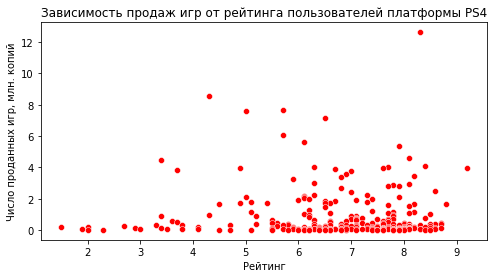

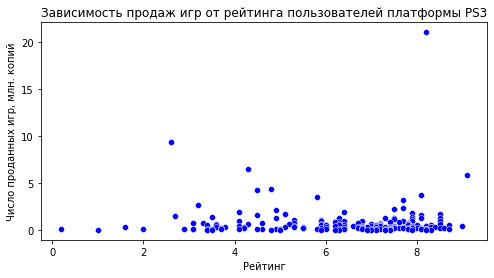

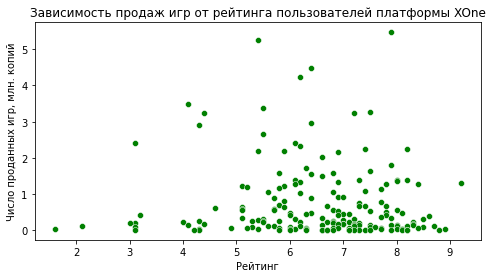

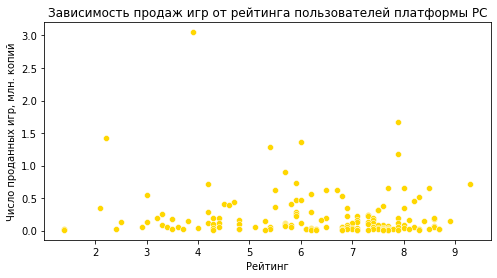

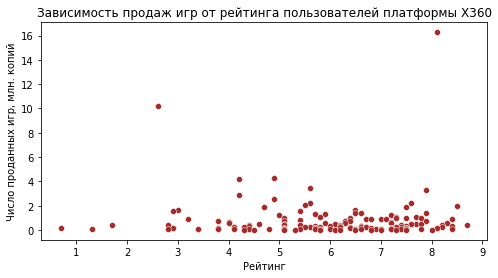

In [38]:
score_corr_users('PS4', 'red')
score_corr_users('PS3', 'blue')
score_corr_users('XOne', 'green')
score_corr_users('PC', 'gold')
score_corr_users('X360', 'brown')

Корреляция между отзывами пользователей и продажами игр отсуствуют: диапазон значений от 0,05 (<b>PC</b>) - до 0,21 (<b>PS3</b>). Это же демонстрируют диаграммы рассеяния.
Таким образом, при анализе продаж игр платформы (по крайней мере, безотносительно жанра и прочих конкретных нюансов), целесообразнее ориентроваться на отзывы критиков, нежели пользователей.

### 3.6  Влияние жанра игры на продажи

In [39]:
actual_period_by_genre = actual_period.groupby('genre')\
                            .agg({'total_sales':['mean','sum']})
actual_period_by_genre

total_sales        
                    mean     sum
genre                           
Action          0.420196  321.87
Adventure       0.096490   23.64
Fighting        0.441375   35.31
Misc            0.405290   62.82
Platform        0.576081   42.63
Puzzle          0.186471    3.17
Racing          0.469294   39.89
Role-Playing    0.499623  145.89
Shooter         1.245882  232.98
Simulation      0.350968   21.76
Sports          0.703972  150.65
Strategy        0.180000   10.08

С 2013 по 2016 гг больше всего было продано игр жанра Action (231,62 млн. копий), меньше всего - Puzzle (2,24 млн. копий).

Text(0, 0.5, 'Число проданных игр, млн. копий')

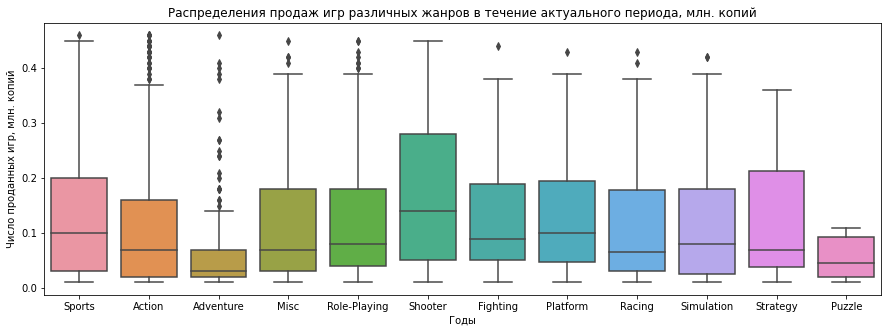

In [40]:
upper_quantile = actual_period['total_sales'].quantile(0.75)
lower_quantile = actual_period['total_sales'].quantile(0.25)

threshold = upper_quantile + 2*lower_quantile

fig, ax = plt.subplots(figsize =(15,5))

sns.boxplot(x = 'genre', 
            y = 'total_sales',
            data = actual_period.query('total_sales <= @threshold'),
            ax=ax)

ax.set_title('Распределения продаж игр различных жанров в течение актуального периода, млн. копий')
ax.set_xlabel('Годы')
ax.set_ylabel('Число проданных игр, млн. копий')

## 4.  Исспледование региональных рынков

### 4.1  Самые популярные платформы

In [41]:
# Группируем датасет по регионам.

actual_period_na = actual_period.groupby(by='platform')\
                                .agg({'na_sales':'sum'})\
                                .sort_values(by='na_sales', ascending=False)\
                                .reset_index()

actual_period_eu = actual_period.groupby(by='platform')\
                                .agg({'eu_sales':'sum'})\
                                .sort_values(by='eu_sales', ascending=False)\
                                .reset_index()

actual_period_jp = actual_period.groupby(by='platform')\
                                .agg({'jp_sales':'sum'})\
                                .sort_values(by='jp_sales', ascending=False)\
                                .reset_index()

In [42]:
# Функция для разделения платформ

def group_na(row):
    if row['na_sales'] >= actual_period_na['na_sales'].head(5)[4]:
        return row[0]
    else:
        return 'other'
    
def group_eu(row):
    if row['eu_sales'] >= actual_period_eu['eu_sales'].head(5)[4]:
        return row[0]
    else:
        return 'other'
    
def group_jp(row):
    if row['jp_sales'] >= actual_period_jp['jp_sales'].head(5)[4]:
        return row[0]
    else:
        return 'other'

actual_period_na['platform_group'] = actual_period_na.apply(group_na, axis=1)
actual_period_eu['platform_group'] = actual_period_eu.apply(group_eu, axis=1)
actual_period_jp['platform_group'] = actual_period_jp.apply(group_jp, axis=1)

In [43]:
# Группируем таблицу с новой колонкой по типу платформы на топ-5 и остальные.

actual_period_na = actual_period_na.groupby(by='platform_group')\
                                .agg({'na_sales':'sum'})\
                                .sort_values(by='na_sales', ascending=False)

actual_period_eu = actual_period_eu.groupby(by='platform_group')\
                                .agg({'eu_sales':'sum'})\
                                .sort_values(by='eu_sales', ascending=False)

actual_period_jp = actual_period_jp.groupby(by='platform_group')\
                                .agg({'jp_sales':'sum'})\
                                .sort_values(by='jp_sales', ascending=False)

In [44]:
# Сравним популярность платформ в регионах.

actual_period_by_region = actual_period_na.merge(actual_period_eu, on='platform_group', how='left')
actual_period_by_region = actual_period_by_region.merge(actual_period_jp, on='platform_group', how='left')
actual_period_by_region

,na_sales,eu_sales,jp_sales
platform_group,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,81.66,42.52,NaN
PS3,63.50,67.81,23.35
other,52.49,58.26,4.19
3DS,38.20,30.96,67.81


<AxesSubplot:title={'center':'Продажи игр по платформам в Японии, млн. копий'}, ylabel='jp_sales'>

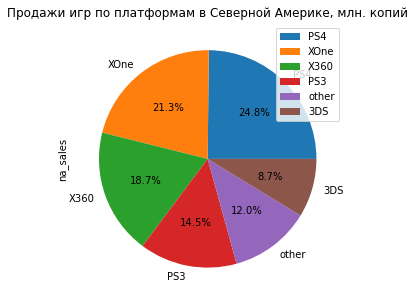

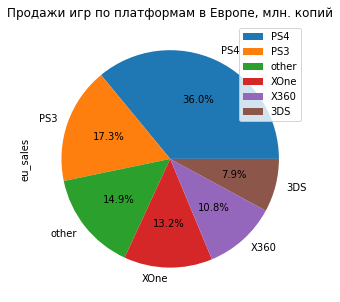

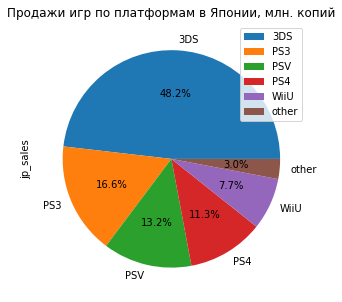

In [45]:
actual_period_na.plot(kind='pie',
                       figsize=(5,5),
                       y='na_sales',
                       title='Продажи игр по платформам в Северной Америке, млн. копий',
                       autopct='%1.1f%%')

actual_period_eu.plot(kind='pie',
                       figsize=(5,5),
                       y='eu_sales',
                       title='Продажи игр по платформам в Европе, млн. копий',
                       autopct='%1.1f%%')

actual_period_jp.plot(kind='pie',
                       figsize=(5,5),
                       y='jp_sales',
                       title='Продажи игр по платформам в Японии, млн. копий',
                       autopct='%1.1f%%')

Продажи игр на платформах <b>PS4</b>, <b>XOne</b> и <b>X360</b> составляют 3/4 от всего объема проданых копий в Северной Америке. <b>PS4</b> имеет некоторое преимущество перед остальными платформами.
<br>На европейском рынке <b>PS4</b> также лидирует и занимает 36%. Ситуация, в целом, очень похожа на американский рынок.
<br>В Японии самой популярной платофрмой является <b>3DS</b>, на которую приходится почти половина продаж всех игр. <b>WiiU</b> и <b>PSV</b>, составляющие в сумме около 20% отличают Японию от двух других регионов. <b>PS4</b> представлена на японском рынке лишь 11%, что оставляет потенциал для развития в этом регионе.
<br>В целом, <b>PS3</b> <b>PS4</b> являются универсальным решением для всех трех рынков.

### 4.2 Самые популярные жанры

In [46]:
# Группируем датасет по регионам.

actual_period_na = actual_period.groupby(by='genre')\
                                .agg({'na_sales':'sum'})\
                                .sort_values(by='na_sales', ascending=False)\
                                .reset_index()

actual_period_eu = actual_period.groupby(by='genre')\
                                .agg({'eu_sales':'sum'})\
                                .sort_values(by='eu_sales', ascending=False)\
                                .reset_index()

actual_period_jp = actual_period.groupby(by='genre')\
                                .agg({'jp_sales':'sum'})\
                                .sort_values(by='jp_sales', ascending=False)\
                                .reset_index()

actual_period_na

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


In [47]:
# Функция для разделения жанров.

actual_period_na['genre_group'] = actual_period_na.apply(group_na, axis=1)
actual_period_eu['genre_group'] = actual_period_eu.apply(group_eu, axis=1)
actual_period_jp['genre_group'] = actual_period_jp.apply(group_jp, axis=1)

In [48]:
# Группируем таблицу с новой колонкой по типу жанров на топ-5 и остальные.

actual_period_na = actual_period_na.groupby(by='genre_group')\
                                .agg({'na_sales':'sum'})\
                                .sort_values(by='na_sales', ascending=False)

actual_period_eu = actual_period_eu.groupby(by='genre_group')\
                                .agg({'eu_sales':'sum'})\
                                .sort_values(by='eu_sales', ascending=False)

actual_period_jp = actual_period_jp.groupby(by='genre_group')\
                                .agg({'jp_sales':'sum'})\
                                .sort_values(by='jp_sales', ascending=False)

In [49]:
# Сравним популярность жанров в регионах.

actual_period_by_region = actual_period_na.merge(actual_period_eu, on='genre_group', how='left')
actual_period_by_region = actual_period_by_region.merge(actual_period_jp, on='genre_group', how='left')
actual_period_by_region

,na_sales,eu_sales,jp_sales
genre_group,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,NaN
other,62.76,68.56,25.79
Role-Playing,46.40,36.97,51.04
Misc,27.49,NaN,9.20


<AxesSubplot:title={'center':'Продажи игр по жанрам в Японии, млн. копий'}, ylabel='jp_sales'>

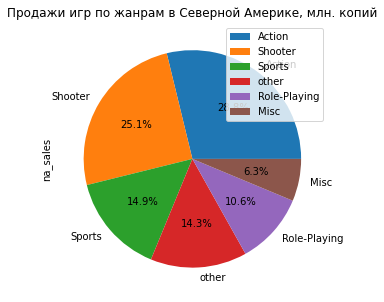

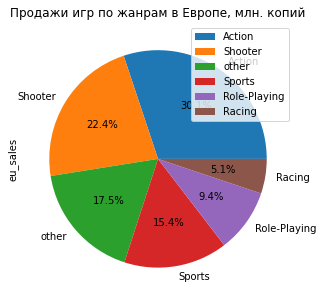

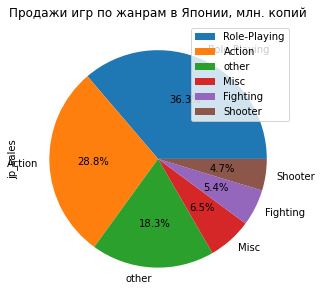

In [50]:
actual_period_na.plot(kind='pie',
                       figsize=(5,5),
                       y='na_sales',
                       title='Продажи игр по жанрам в Северной Америке, млн. копий',
                       autopct='%1.1f%%')

actual_period_eu.plot(kind='pie',
                       figsize=(5,5),
                       y='eu_sales',
                       title='Продажи игр по жанрам в Европе, млн. копий',
                       autopct='%1.1f%%')

actual_period_jp.plot(kind='pie',
                       figsize=(5,5),
                       y='jp_sales',
                       title='Продажи игр по жанрам в Японии, млн. копий',
                       autopct='%1.1f%%')

Популярность жанров в Америке и Европе во многом совпадают - в приоритете <b>Action</b> и <b>Shooter</b>. В Японии лидирует <b>Role-Playing</b>, а <b>Shooter</b> имеет самый низкий приоритет.
<br>Можно сделать вывод о том, что рынок Японии сильно отличается от схожих между собой Америкой и Европой как в плане популярности платформ, так и в плане популярности игроовых жанров.

### 4.3  Влияние рейтинга ESRB на продажи

Text(0, 0.5, 'Рейтинг')

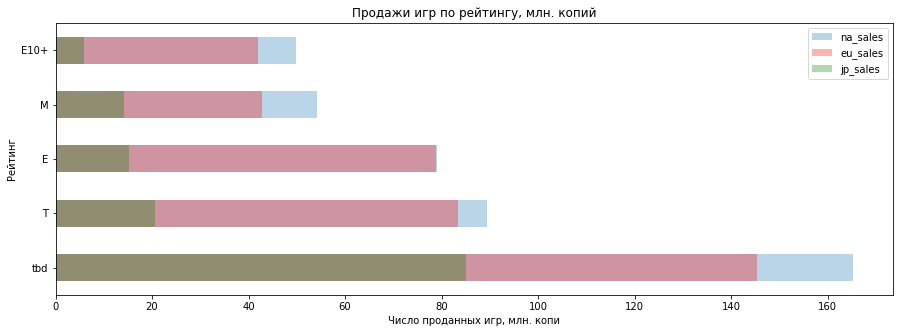

In [51]:
# Сгруппируем данные по рейтингу ESRB.

actual_period_na = actual_period.groupby(by='rating')\
                                .agg({'na_sales':'sum'})\
                                .sort_values(by='na_sales', ascending=False)

actual_period_eu = actual_period.groupby(by='rating')\
                                .agg({'eu_sales':'sum'})\
                                .sort_values(by='eu_sales', ascending=False)

actual_period_jp = actual_period.groupby(by='rating')\
                                .agg({'jp_sales':'sum'})\
                                .sort_values(by='jp_sales', ascending=False)

ax = actual_period_na.plot(kind='barh',
                      grid=True,
                      alpha=0.3,
                      legend=True,
                      figsize=(15,5),
                      title='Продажи игр по рейтингу, млн. копий')


actual_period_eu.plot(
    kind='barh',
    color='red',
    alpha=0.3,
    ax=ax,
)

actual_period_jp.plot(
    kind='barh',
    color='green',
    alpha=0.3,
    ax=ax,
)

ax.set_xlabel('Число проданных игр, млн. копи')
ax.set_ylabel('Рейтинг')

Самые продаваемые игры во всех регионах имеют рейтинг <b>T (teens)</b>.
<br>На рынке Японии разница между продажами игр разных рейтингов почти отсутсвует; исключение составляют более, чем вдве меньшие продажи игр с рейтингом <b>E10 (Everyone 10 and older)</b>.
<br>Игры категории <b>E (Everyone)</b> на рынке Европы имеют большее число проданных копий, чем в США, что нетипично, по сравнению с остальными рейтинговыми категориями. В остальных категориях различия продаж между регионами отсутствуют. 

## 5. Проверка гипотез

### 5.1  Гипотеза о равенстве рейтингов платформ

Мы имеем следующие гипотезы:
<br><b>H0</b>: средние пользовательские рейтинги платформ <b>XOne</b> и <b>PC</b> одинаковые;
<br><b>H1</b>: средние пользовательские рейтинги платформ <b>XOne</b> и <b>PC</b> различаются.
<p>Для анализа используется t-критерий Стьюдента, так как сравниваемые выборки независимы друг от друга.

In [52]:
# Уберем "заглушки" (-1 и -2), проставленные ранее для отсуствующих значений пользовательских рейтингов.

actual_period = actual_period.loc[actual_period['user_score'] > -1]
actual_period.shape

(1192, 12)

In [53]:
xone = actual_period.query('platform == "XOne"')['user_score']
pc = actual_period.query('platform == "PC"')['user_score']

result = st.ttest_ind(xone, pc)

alpha = .05

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Средние рейтинги игр на этих платформах действительно очень близки.

In [54]:
actual_period_xone = actual_period.loc[actual_period['platform'] == 'XOne']
actual_period_pc = actual_period.loc[actual_period['platform'] == 'PC']
print('Средний рейтинг игр на XOne:', round(actual_period_xone['user_score'].mean(), 2))
print('Средний рейтинг игр на PC:', round(actual_period_pc['user_score'].mean(), 2))

Средний рейтинг игр на XOne: 6.52
Средний рейтинг игр на PC: 6.27


### 5.2  Гипотеза о равенстве рейтингов жанров

Мы имеем следующие гипотезы:
<br><b>H0</b>: средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> одинаковые.
<br><b>H1</b>: средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> разные.
<p>Для анализа используется t-критерий Стьюдента, так как сравниваемые выборки независимы друг от друга.

In [55]:
action = actual_period.query('genre == "Action"')['user_score']
sports = actual_period.query('genre == "Sports"')['user_score']

result = st.ttest_ind(action, sports)

alpha = .05

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


Таким образом, средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> существенно различаются.

In [56]:
print(actual_period.query('genre == "Action"')['user_score'].describe(), '\n\n')
print(actual_period.query('genre == "Sports"')['user_score'].describe())

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64 


count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64


## 6. Выводы

Из проведенного анализа актуального перирода продажи игр в трех регионах, <b>были получены следующие выводы</b>:
 - Учитывая срок жизни платформ, аткуальный период для исследования определен как 2013 - 2016 гг.
 - В тотале по всем регионам лидерство у 5 платформ на которые приходится более половины всех продаж: PS4, PS3, XOne, 3DS, X360.
 - Платформы PS3, X360 и 3DS находятся в нисходящем тренде (принимая во внимание вывод выше о том, что период топовых продаж платформ составляет 1-3 года. Возможно, PS4 и XOne еще не прошли свой пик и по-прежнему являются перспективными для продаж.
 - Оценки платформ критиками и пользователями разнятся: то, что критики считают лучшим, рассматривается пользователями как средне-высокое.
 - Корреляция между отзывами критикой и пользователей и продажами игр очень слабая (0,2 - 0,3).
 - Продажи игр на платформах PS4, XOne и X360 составляют 3/4 от всего объема проданых копий в Северной Америке. PS4 имеет некоторое преимущество перед остальными платформами.
 - На американском и европейском рынках лидирует PS4 и занимает более 30% продаж игр, в Японии самой популярной платофрмой является 3DS (около 30%).
 - Популярность жанров в Америке и Европе во многом совпадают - в приоритете Action и Shooter; в Японии лидирует Role-Playing, а Shooter имеет самый низкий приоритет.
 - Самые продаваемые игры во всех регионах имеют рейтинг T (teens).
 - Средний рейтинг игр на XOne и PC очень близки.
 - Средние пользовательские рейтинги жанров Action и Sports различаются - первый имеет 0,4 против 0,4 у Sports.
 
 <b>Рекомендации для отдела маркетинга/продаж:</b>
 - При прогнозировании продаж игр платформы (по крайней мере, безотносительно жанра и прочих конкретных нюансов), целесообразнее ориентроваться на отзывы критиков, нежели пользователей (корреляция чуть выше, чем с отзывами пользователей).
 - В целом, PS3 PS4 являются универсальным решением для всех трех рынков.
 - PS4 представлена на японском рынке лишь 11%, что оставляет потенциал для развития в этом регионе, так как уже очень популярна в Америке и Европе.
 - Для Японии будет интересен жанр Role-Playing, для Америки и Европы - Action и Shooter.
